# Time Series Analysis

In [1]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Time Series Decomposition
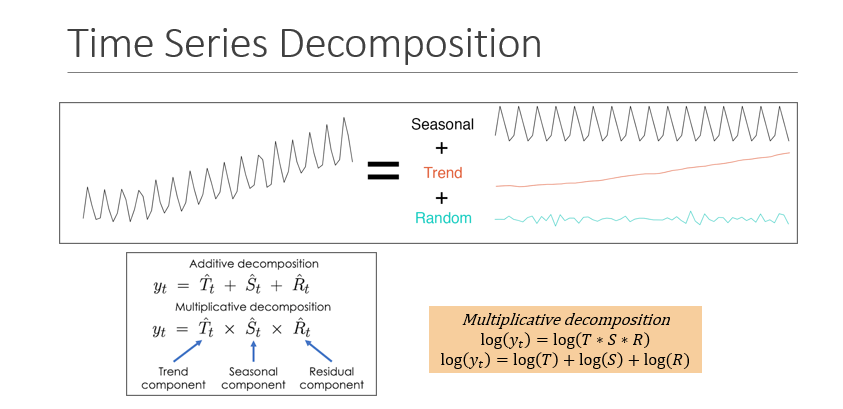

In [6]:
import pandas as pd
df = pd.read_csv("AirPassengers.csv", index_col="Month", parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


### Visualize the time series data

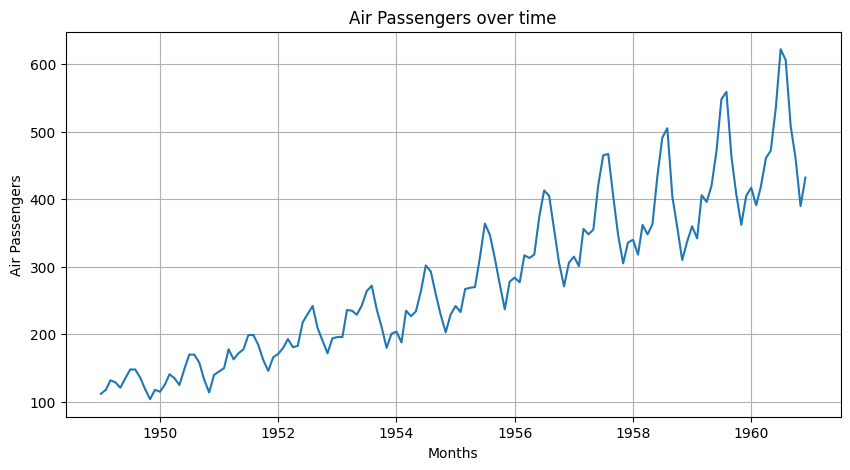

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['Passengers'])
plt.xlabel('Months')
plt.ylabel("Air Passengers")
plt.title("Air Passengers over time")
plt.grid()
plt.show()

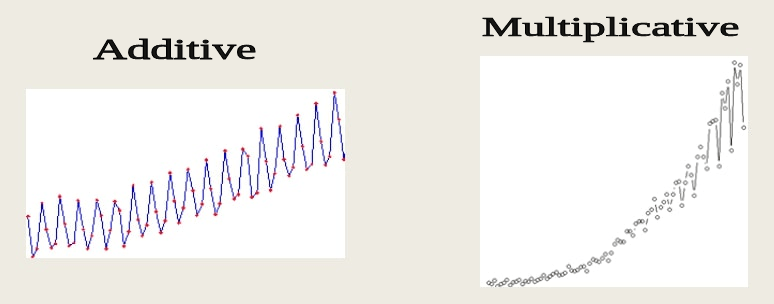

### Use multiplicative model for above time series

### Decomposition

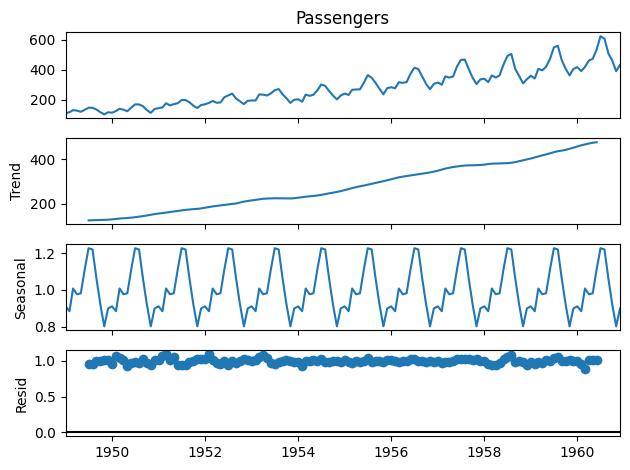

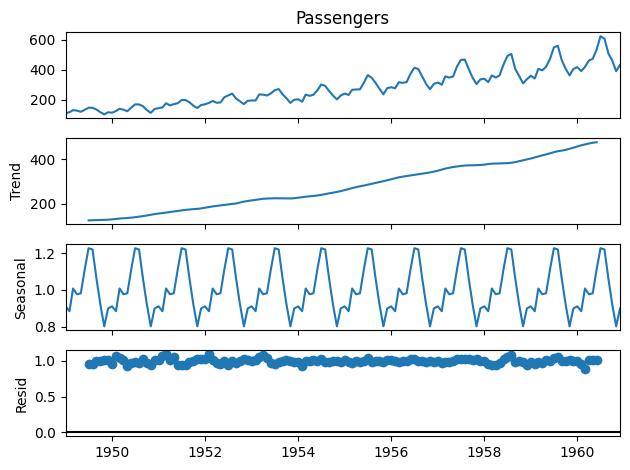

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(df['Passengers'], model="multiplicative")
Q.plot()

In [13]:
Q.observed

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Passengers, Length: 144, dtype: float64

In [15]:
Q.trend[10:]

Month
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
                 ...    
1960-08-01           NaN
1960-09-01           NaN
1960-10-01           NaN
1960-11-01           NaN
1960-12-01           NaN
Name: trend, Length: 134, dtype: float64

In [16]:
Q.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [18]:
Q.resid[10:]

Month
1949-11-01    1.006270
1949-12-01    1.011812
1950-01-01    0.962603
1950-02-01    1.071467
1950-03-01    1.037447
                ...   
1960-08-01         NaN
1960-09-01         NaN
1960-10-01         NaN
1960-11-01         NaN
1960-12-01         NaN
Name: resid, Length: 134, dtype: float64

### Trend plot

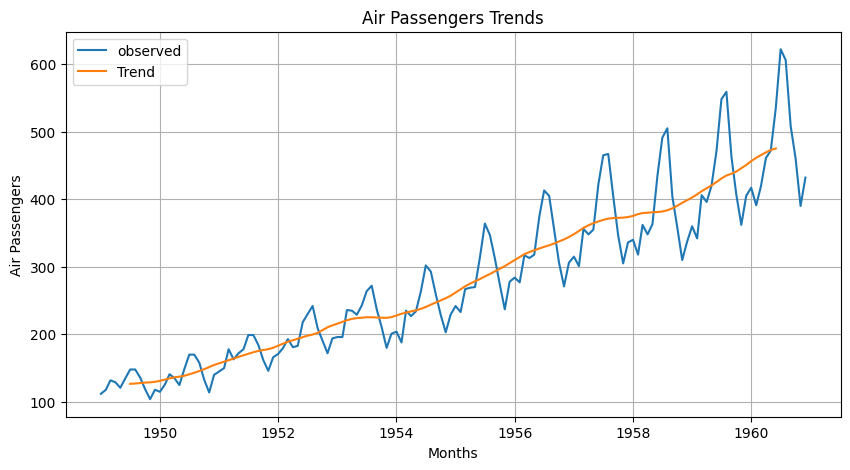

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(Q.observed, label='observed')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Air Passengers Trends')
plt.legend()
plt.grid()
plt.show()

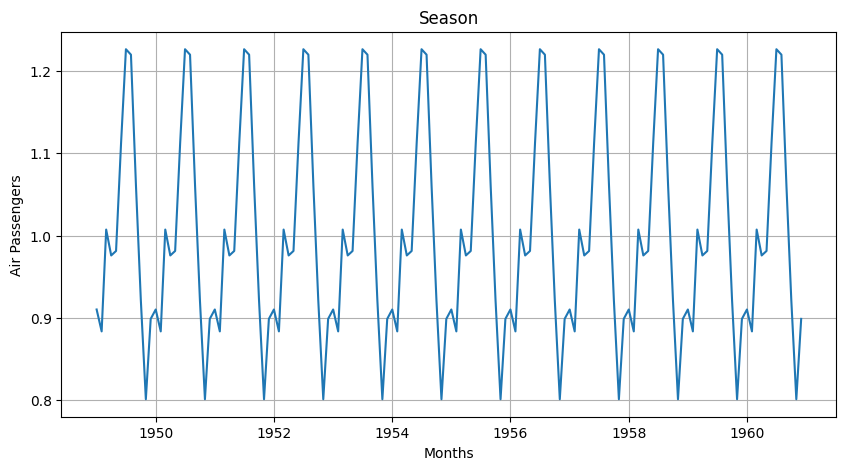

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(Q.seasonal)
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Season')
plt.grid()
plt.show()

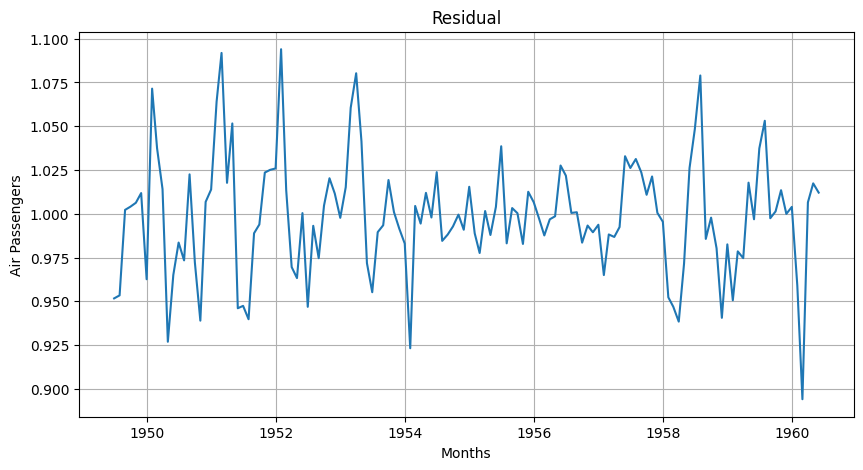

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(Q.resid)
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Residual')
plt.grid()
plt.show()